# EDA. Exploring web events

Importing libraries:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 22 }
plt.rc('font', **font)

Reading web events:

In [3]:
df_web = pd.read_csv('../data/web_data.csv')

In [4]:
df_web.head()

,date,module,ip,resource,user
0,150902-19:31.44,ca644,80.111.147.215,/,yux6
1,150902-19:31.44,ca644,80.111.147.215,/,yux6
2,150916-17:52.27,ca114,95.44.98.176,/,bentlej2
3,150921-10:02.49,ca116,136.206.102.206,/,gctest2
4,150921-10:57.31,ca116,136.206.202.40,/,baranj2


In [5]:
'{:,}'.format(len(df_web))

'25,500,773'

In [6]:
df_web['module'].value_counts()

ca116       7591198
ca117       7457339
ca277       2701012
ca177       2606634
ca114       2223812
ca278       1307381
ca320        549989
ttycast      423367
ca146        421325
einstein     100913
be115         82057
ca297         27616
ca000          6987
ca247           755
ca216           386
ca644             2
Name: module, dtype: int64

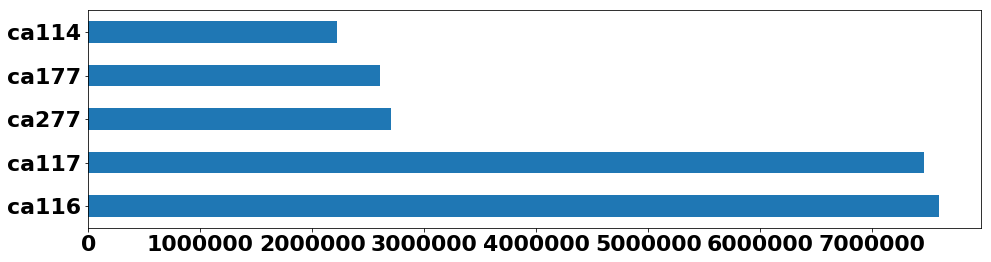

In [7]:
fig = df_web['module'].value_counts()[:5].plot.barh(figsize=(16, 4))

In [8]:
fig.get_figure().savefig('../figures/exploring_Web_events_per_module.png')

Convert to the appropiate datetime object type:

In [9]:
df_web['date'] = pd.to_datetime(df_web['date'], format='%y%m%d-%H:%M.%S')

In [10]:
df_web.head(2)

,date,module,ip,resource,user
0,2015-09-02 19:31:44,ca644,80.111.147.215,/,yux6
1,2015-09-02 19:31:44,ca644,80.111.147.215,/,yux6


Activity every day:

In [11]:
from datetime import datetime, timedelta

In [12]:
start = datetime(year=2017, month=9, day=1)
end = datetime(year=2018, month=5, day=1)

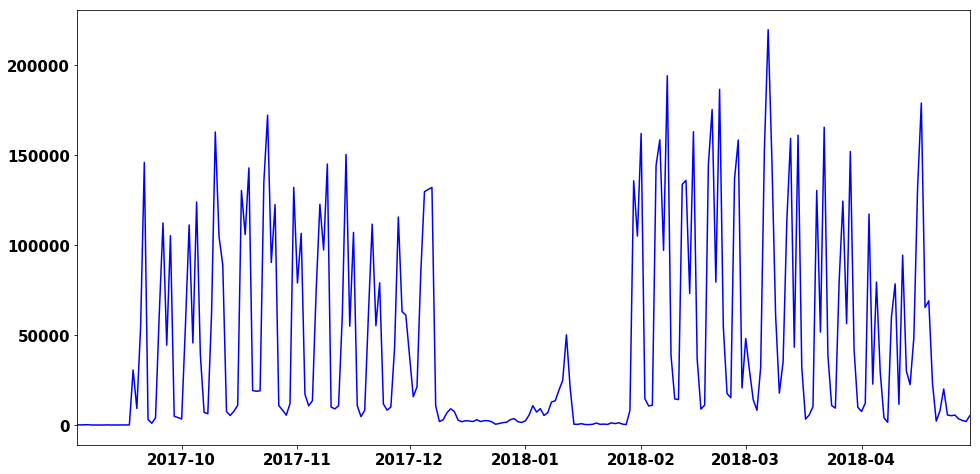

In [13]:
fig = df_web['date'][
        (df_web['date'] > start) &
        (df_web['date'] < end)
    ].dt.date.value_counts().plot(figsize=(16, 8), color='b', fontsize=15)

In [14]:
fig.get_figure().savefig('../figures/exploring_Web_2017_2018.png')

In [15]:
start = datetime(year=2015, month=9, day=1)
end = datetime(year=2019, month=5, day=1)

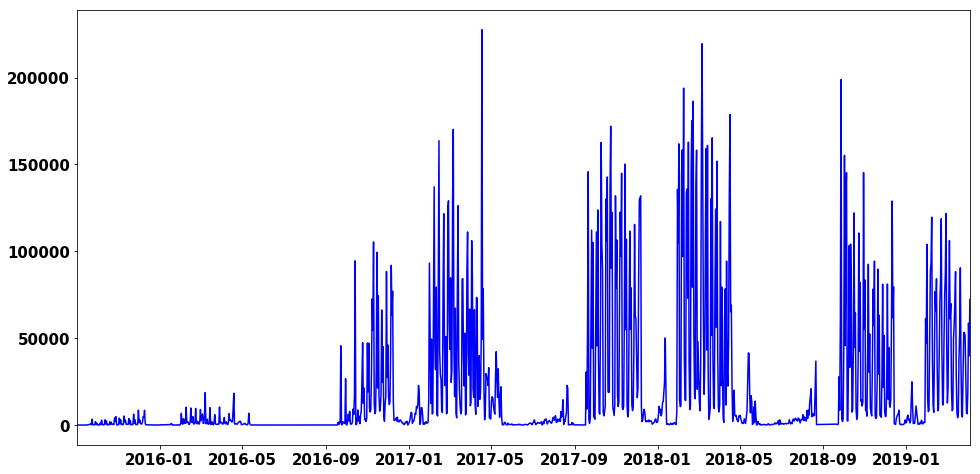

In [16]:
fig = df_web['date'][
        (df_web['date'] > start) &
        (df_web['date'] < end)
    ].dt.date.value_counts().plot(figsize=(16, 8), color='b', fontsize=15)

In [17]:
fig.get_figure().savefig('../figures/exploring_Web_2015_2019.png')

Did they click on any of the emails' links?

In [18]:
start = datetime(year=2017, month=9, day=1)
end = datetime(year=2018, month=5, day=1)

In [19]:
predictcs_resources = df_web['resource'][
    (df_web['date'] > start) &
    (df_web['date'] < end) &
    (df_web['resource'].str.contains('predictcs=1'))
].value_counts()

In [20]:
predictcs_resources

/einstein/get-task-status?predictcs=1                    93
/einstein/get-credentials?predictcs=1                    93
/19-files.html?predictcs=1                                7
/html/week07/lab01/01_lab.html?predictcs=1                7
/11-plot-tasks.html?predictcs=1                           5
/15-functions.html?predictcs=1                            4
/labsheet-15.html?predictcs=1                             4
/labsheet-21.html?predictcs=1                             4
/exam-1-sample.html?predictcs=1                           3
/html/week06/lab02/02_lab.html?predictcs=1                3
/01-tasks.html?predictcs=1                                3
/labsheet-04.html?predictcs=1                             3
/html/week08/lab02/02_lab.html?predictcs=1                3
/labsheet-19.html?predictcs=1                             2
/08-tasks.html?predictcs=1                                2
/labsheet-10-extra.html?predictcs=1                       2
/notes-06.html?predictcs=1              

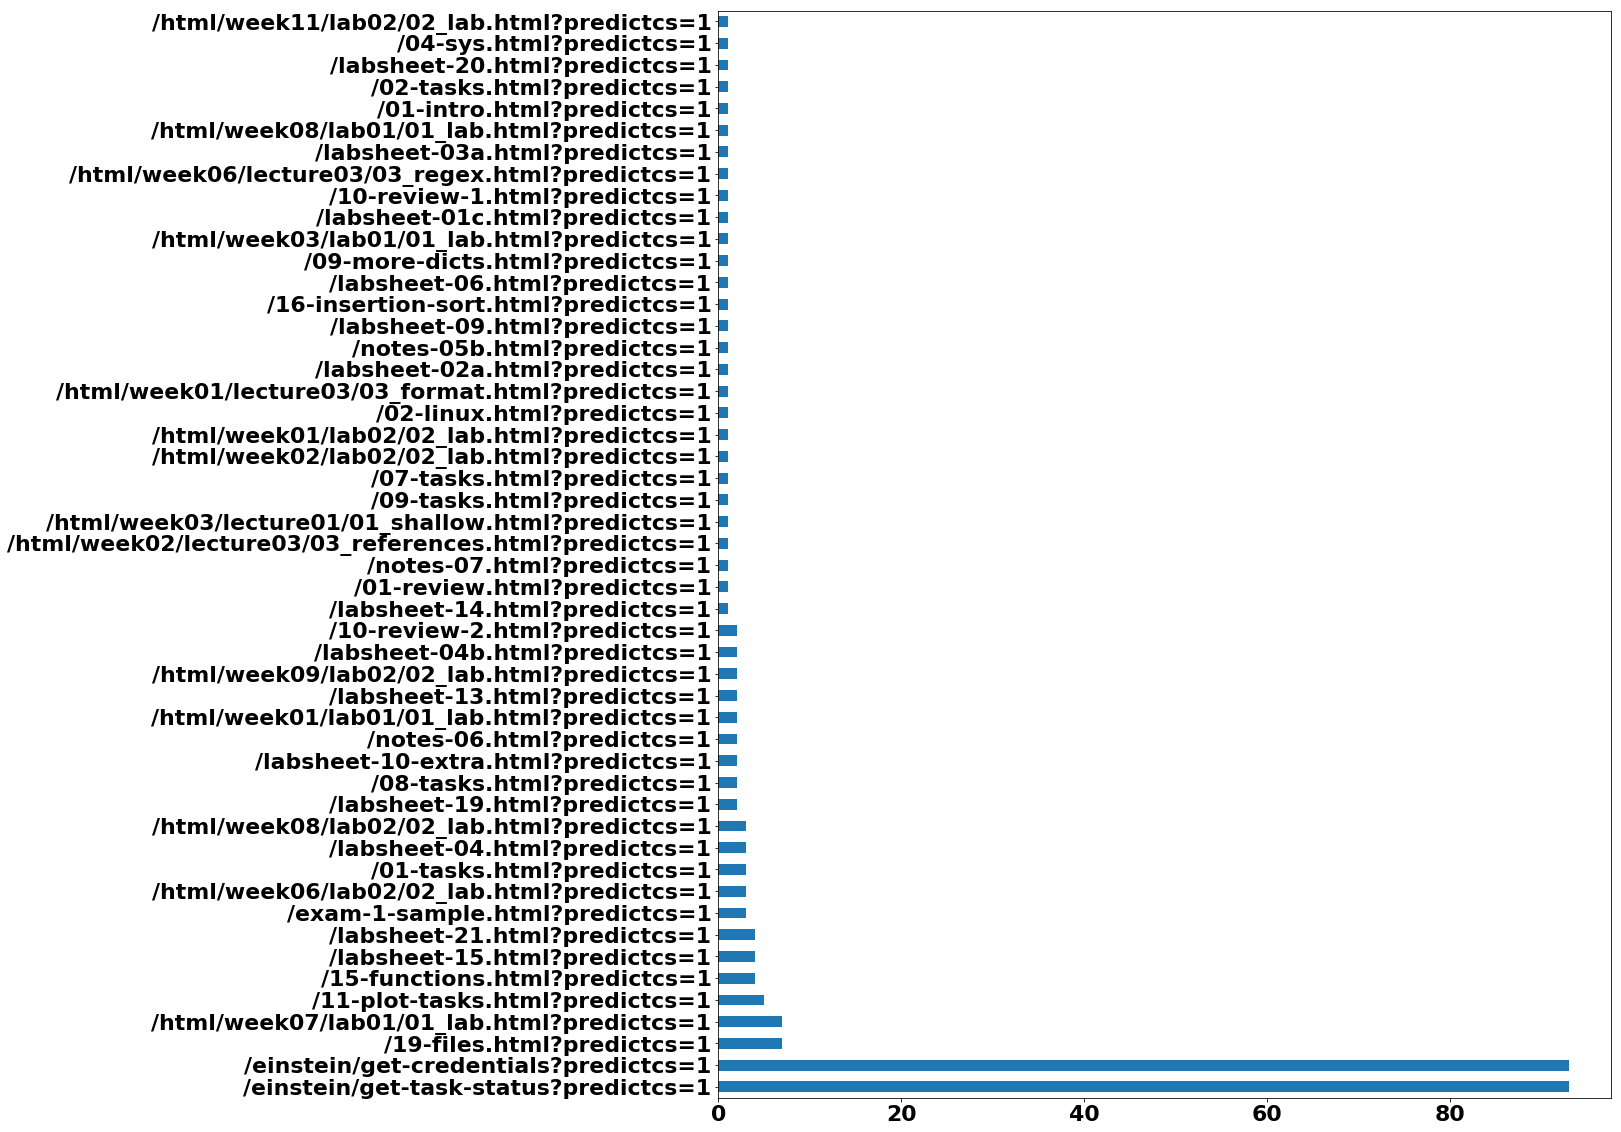

In [21]:
fig = predictcs_resources.plot.barh(figsize=(16, 20))

In [22]:
fig.get_figure().savefig('../figures/exploring_Web_Predictcs_Resources.png', bbox_inches="tight")

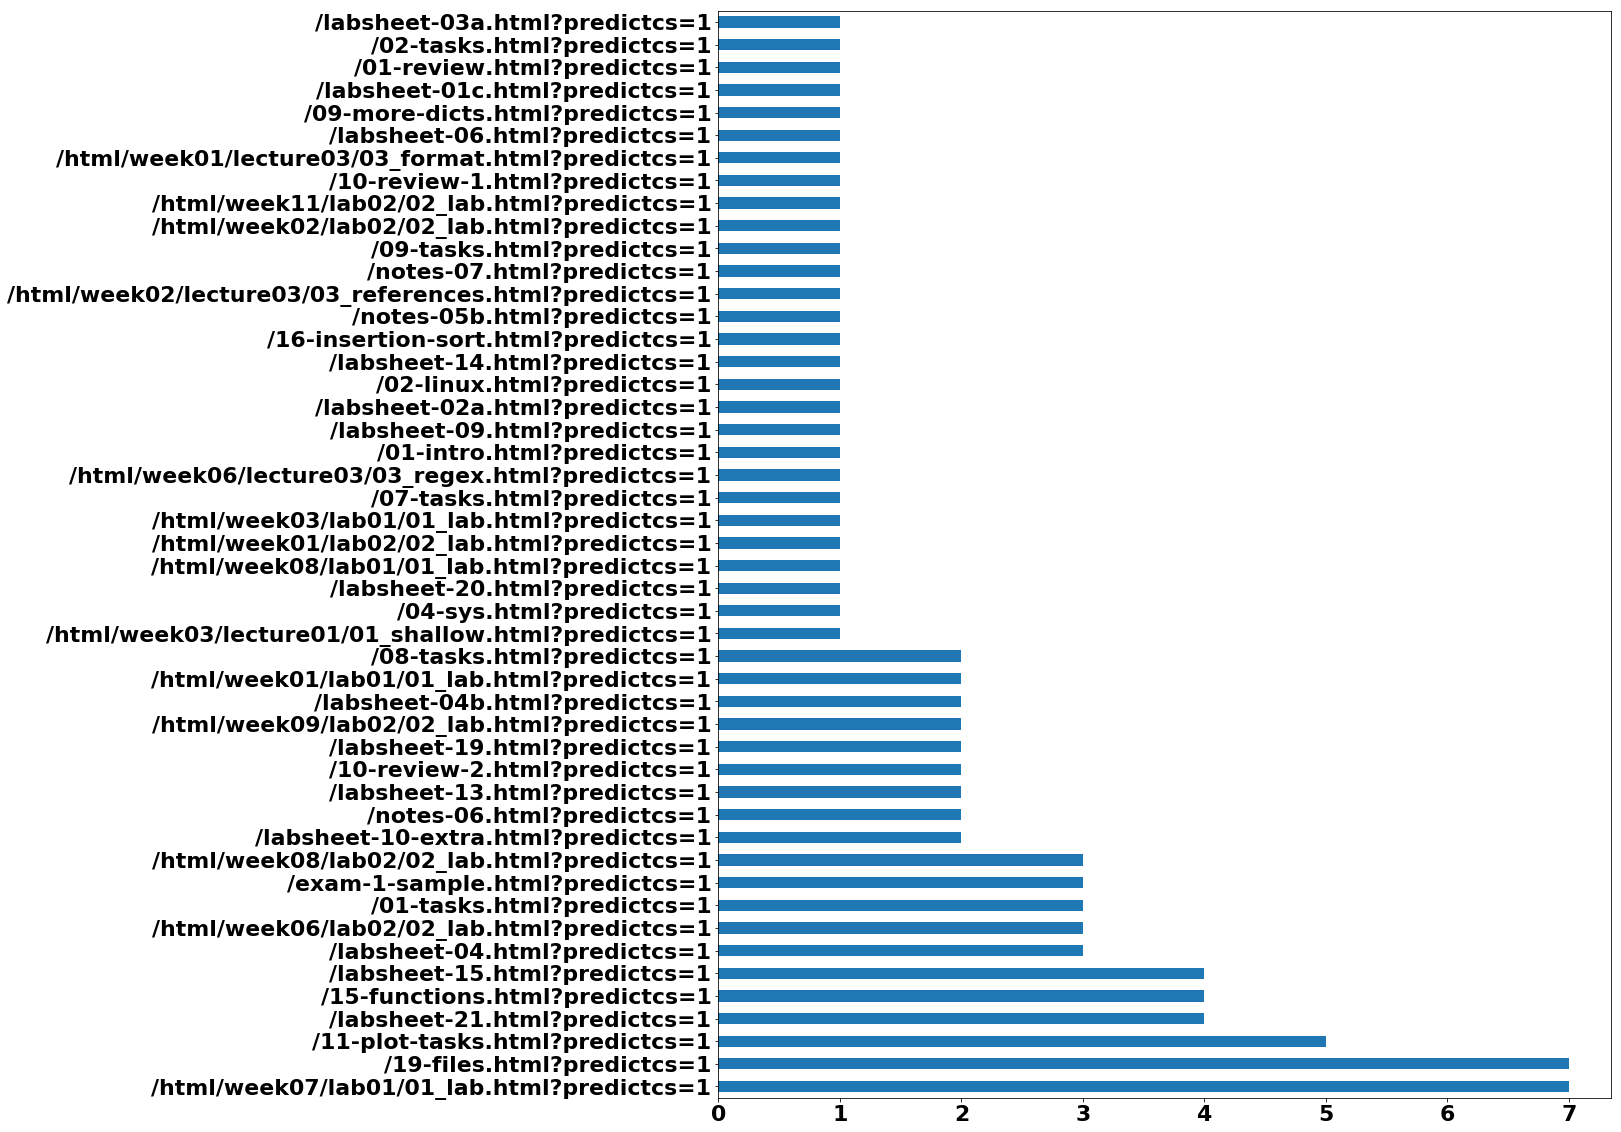

In [23]:
fig = df_web['resource'][
    (df_web['date'] > start) &
    (df_web['date'] < end) &
    (df_web['resource'].str.contains('predictcs=1')) & 
    (~df_web['resource'].str.contains('get-')) # ignore: get-task-status & get-credentials
].value_counts().plot.barh(figsize=(16, 20))

In [24]:
fig.get_figure().savefig('../figures/exploring_Web_Predictcs_Resources_Subset.png', bbox_inches="tight")